<a href="https://colab.research.google.com/github/brianellis1997/Music_Generation/blob/main/Popularity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/brianellis1997/Music_Generation.git

Cloning into 'Music_Generation'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 150 (delta 71), reused 36 (delta 7), pack-reused 0
Receiving objects: 100% (150/150), 1.13 MiB | 3.22 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS340/spotify_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


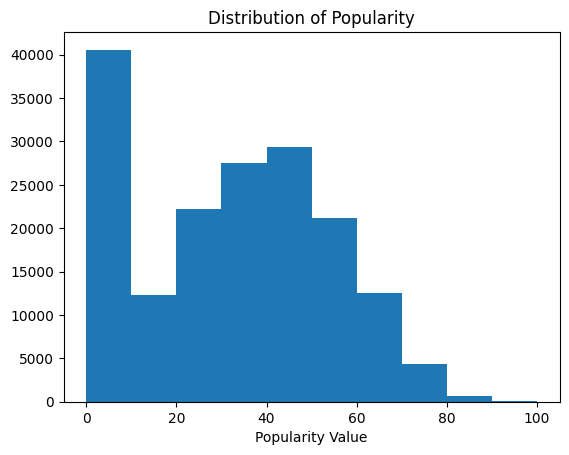

In [5]:
plt.hist(df['popularity'])
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Value')
plt.show()

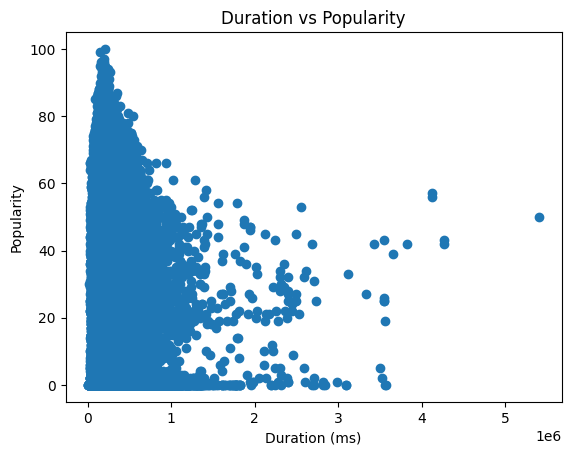

In [6]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()

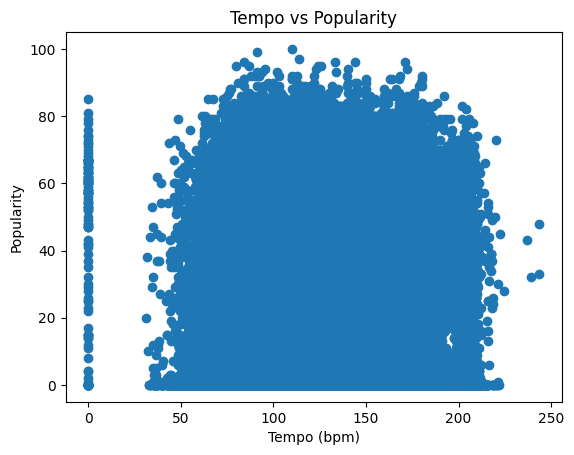

In [7]:
plt.scatter(x=df['tempo'], y=df['popularity'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Popularity')
plt.title('Tempo vs Popularity')
plt.show()

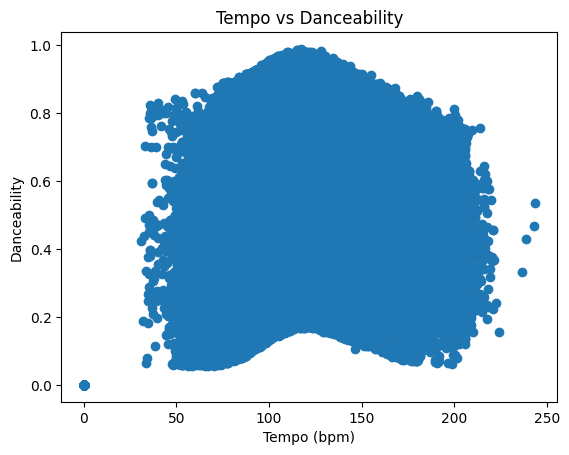

In [8]:
plt.scatter(x=df['tempo'], y=df['danceability'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.title('Tempo vs Danceability')
plt.show()

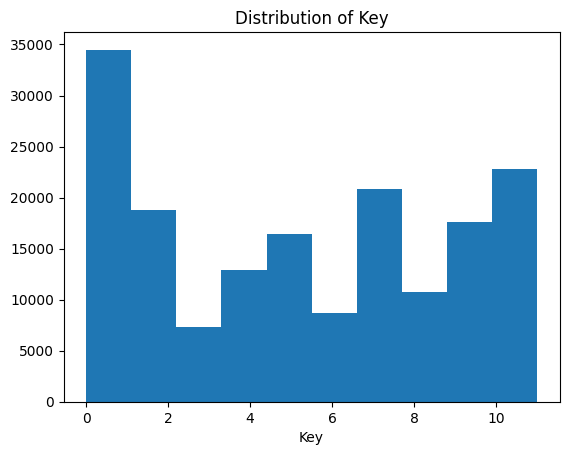

In [9]:
plt.hist(df['key'])
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.show()

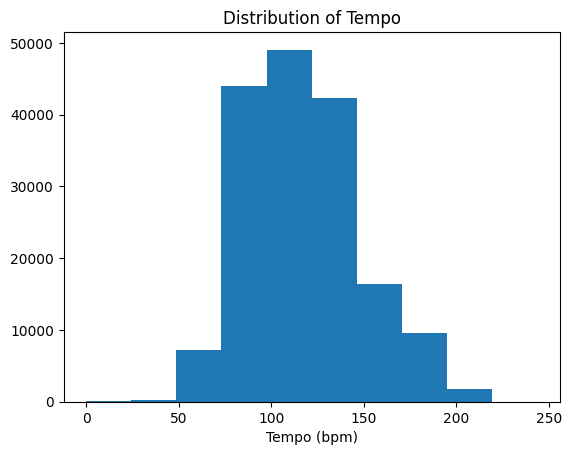

In [10]:
plt.hist(df['tempo'])
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (bpm)')
plt.show()

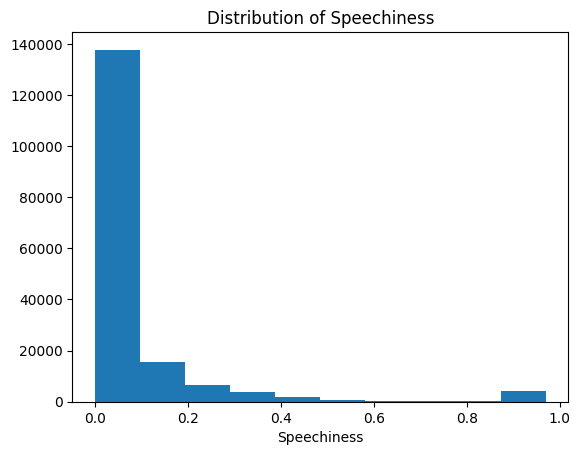

In [11]:
plt.hist(df['speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.show()

In [12]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

# MIDI Feature Extractor

In [13]:
from music21 import *

# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 1, BWV 772.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
key_signature = None
for event in midi_stream.flat.getElementsByClass('KeySignature'):
    key_signature = event
    break

if key_signature:
    print("Key signature:", key_signature)
else:
    print("Key signature not found in the MIDI file.")

Key signature: G# major


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [14]:
# Get total duration of the piece
total_duration = midi_stream.duration.quarterLength

print("Total duration:", total_duration, "quarters")

Total duration: 88.0 quarters


In [15]:
88/80

1.1

In [16]:

# Extract tempo
tempo = None
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
        tempo = event
        break

if tempo:
    print("Tempo:", tempo)
else:
    print("Tempo information not found in the MIDI file.")


Tempo: <music21.tempo.MetronomeMark andantino Quarter=80>


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
# Extract tempo
tempo_value = None
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
        tempo_value = int(event.number)
        break

if tempo_value is not None:
    print("Tempo:", tempo_value)
else:
    print("Tempo information not found in the MIDI file.")

Tempo: 80


In [18]:
type(tempo_value)

int

In [19]:
tempo_value

80

In [20]:
quarter_lengths = midi_stream.duration.quarterLength
quarter_lengths

88.0

In [21]:
duration_min = quarter_lengths/tempo_value
duration_min

1.1

In [22]:
# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 13.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
key_signature = None
for event in midi_stream.flat.getElementsByClass('KeySignature'):
    key_signature = event
    break

if key_signature:
    print("Key signature:", key_signature)
else:
    print("Key signature not found in the MIDI file.")

Key signature: a minor


In [23]:
quarter_lengths = midi_stream.duration.quarterLength
quarter_lengths

100.0

In [24]:
# Extract tempo
tempo_value = None
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
        tempo_value = int(event.number)
        break

if tempo_value is not None:
    print("Tempo:", tempo_value)
else:
    print("Tempo information not found in the MIDI file.")

Tempo: 100


In [25]:
duration_min = quarter_lengths/tempo_value
duration_min

1.0

In [26]:
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
      print(event)

<music21.tempo.MetronomeMark Quarter=100>
<music21.tempo.MetronomeMark Quarter=100>


# EDA

In [27]:
df.describe(include='all')

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,4BJqT0PrAfrxzMOxytFOIz,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000


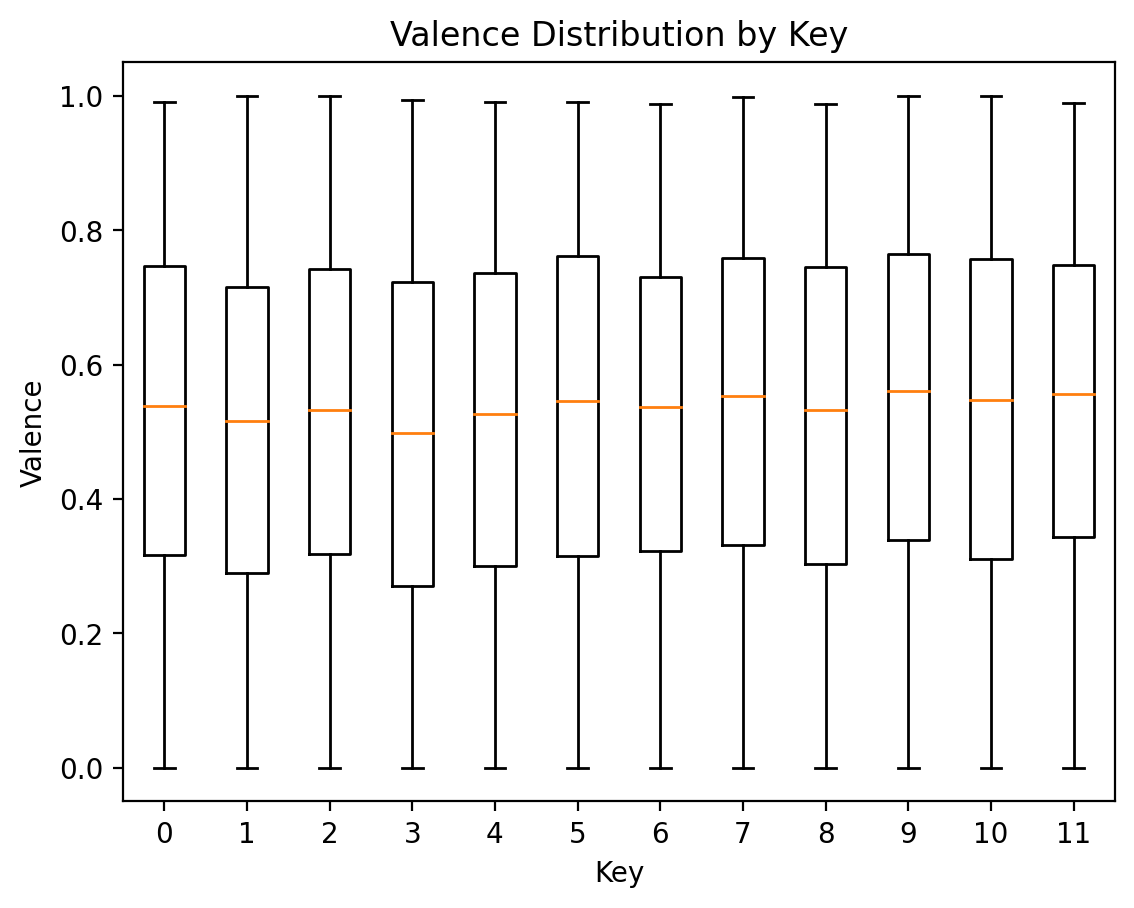

In [28]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'key' and 'valence'

# Create a list of valence values for each key category
valence_by_key = [df[df['key'] == key]['valence'] for key in range(12)]

# Create a box plot
plt.boxplot(valence_by_key)
plt.xlabel('Key')
plt.ylabel('Valence')
plt.title('Valence Distribution by Key')
plt.xticks(range(1, 13), range(12))  # Assuming 'key' ranges from 0 to 11
plt.show()


# Data Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [30]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'energy', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('danceability', axis=1)
y = df['danceability']

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [33]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.14297840157216396


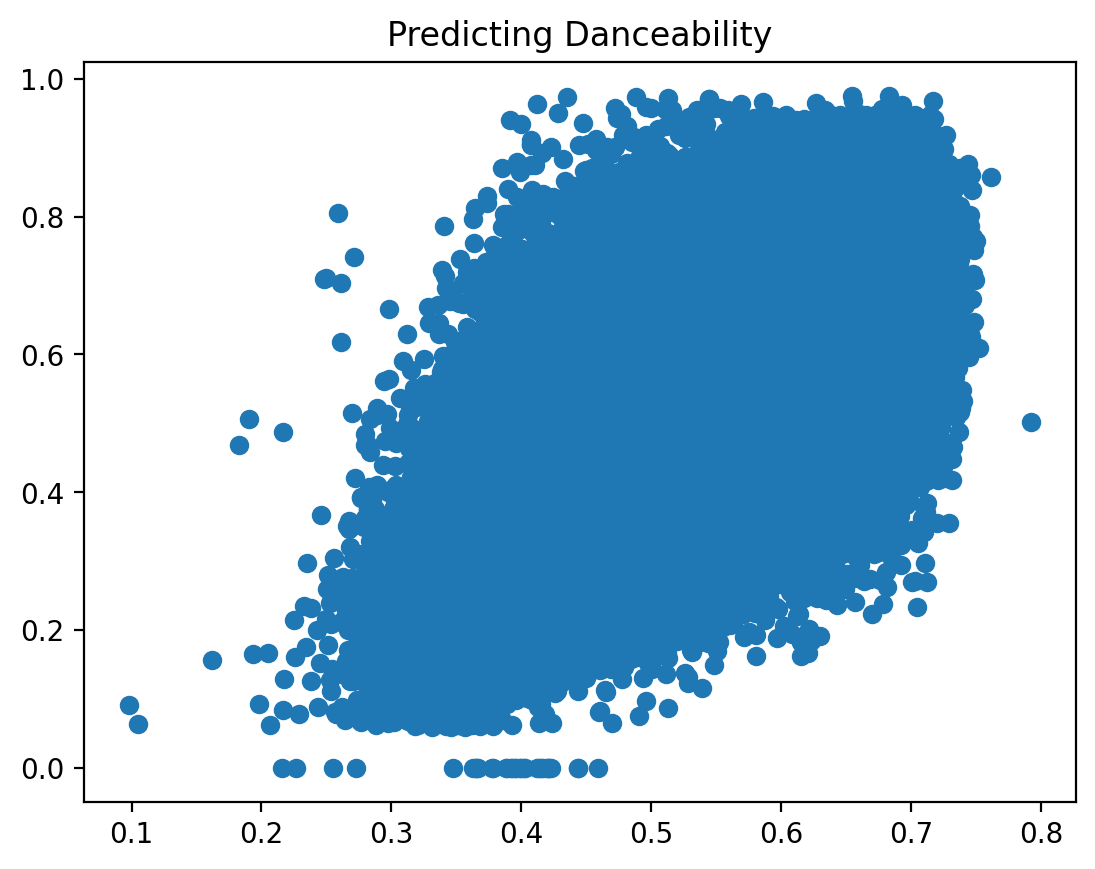

In [36]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Danceability')
plt.show()

In [44]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('energy', axis=1)
y = df['energy']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [47]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.1612730609001531


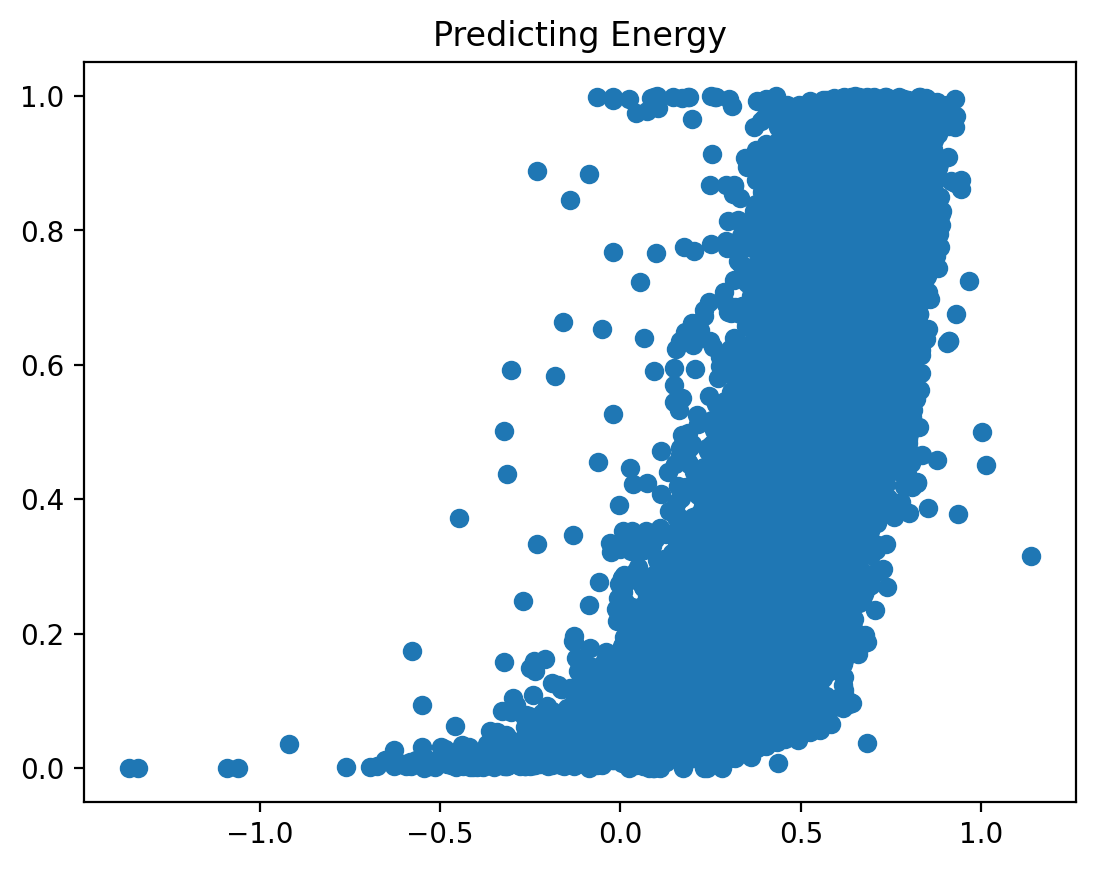

In [51]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.show()

A polynomial model might work better here.

Root Mean Squared Error: 0.14664460408301241


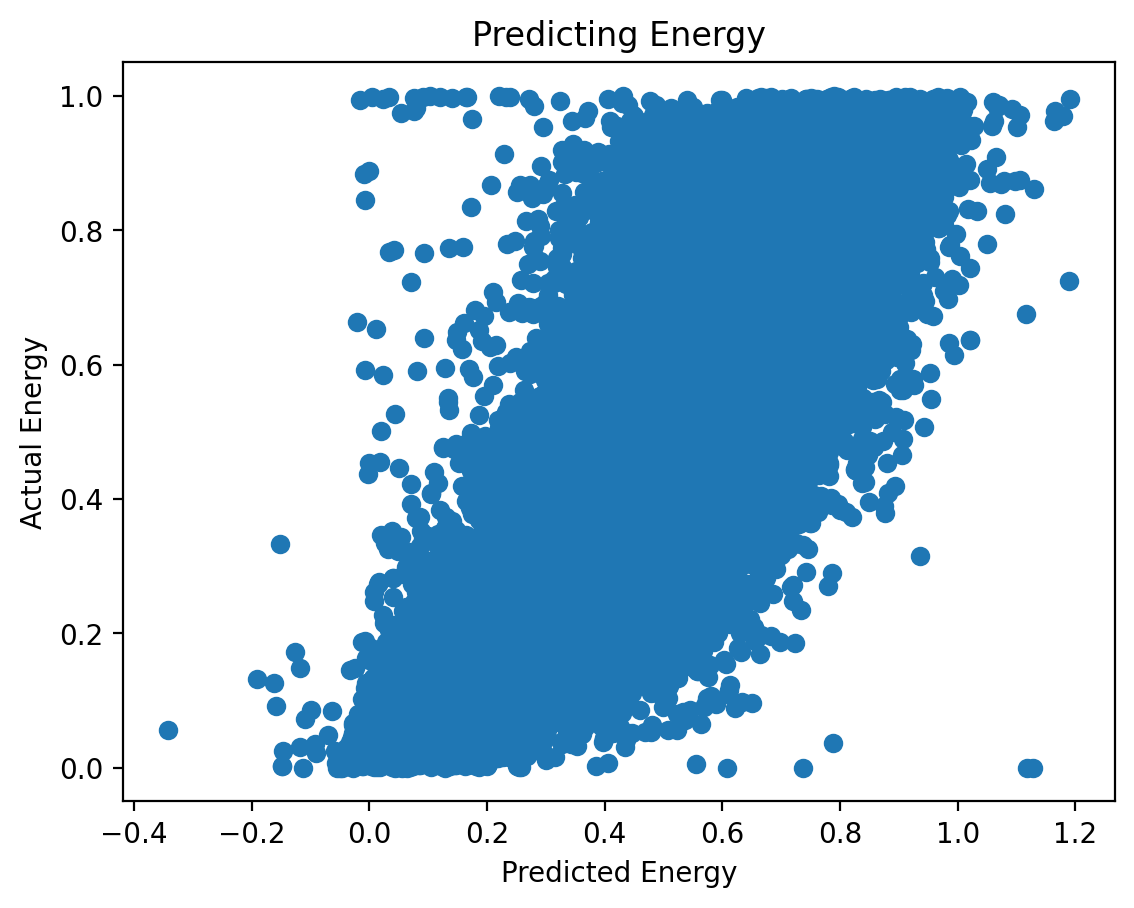

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# # Drop unnecessary columns
# df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

# # Split data into features (X) and target variable (y)
# X = df2.drop('energy', axis=1)
# y = df['energy']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize StandardScaler
# sc = StandardScaler()

# # Fit and transform training data, transform testing data
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Transform features into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

Root Mean Squared Error: 0.14435144660062713


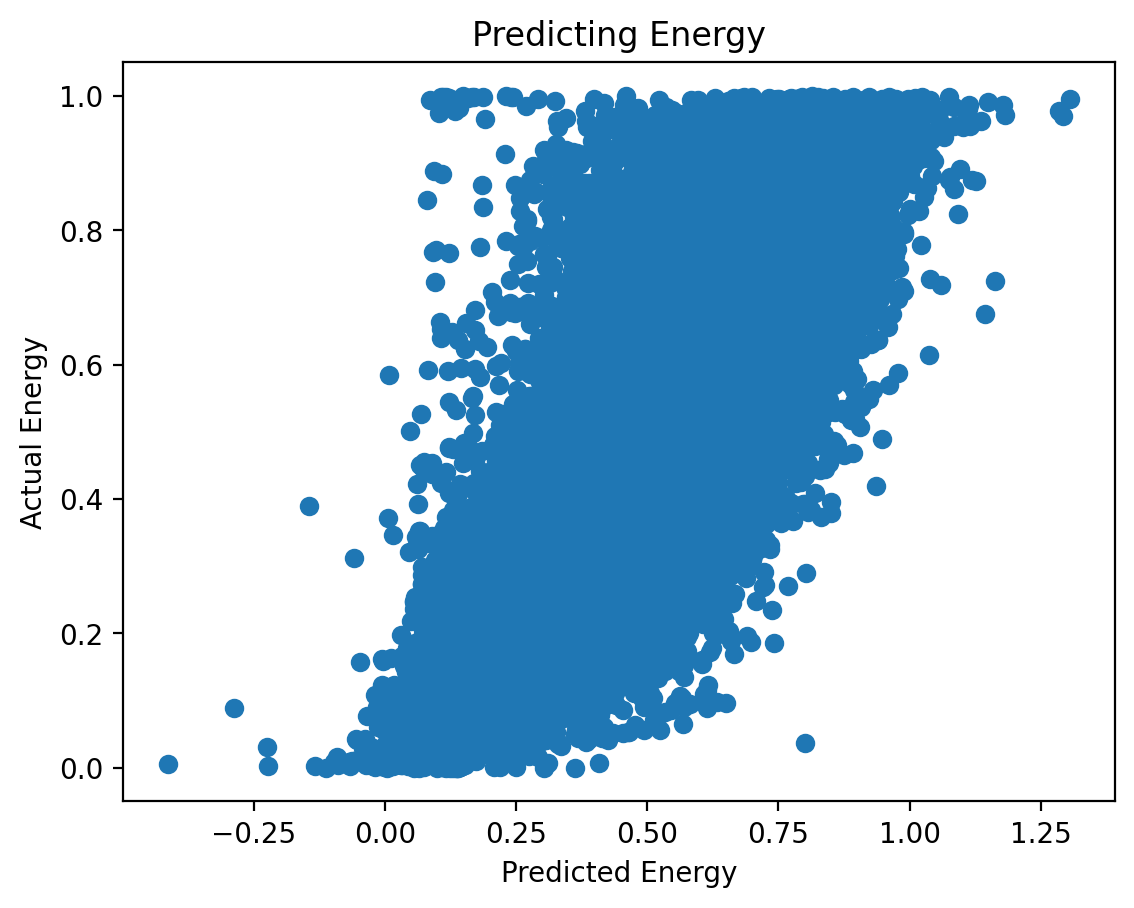

In [53]:
# Transform features into polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

We see that a polynomial value of 2 fits energy the best.